# Load the Dataset


In [1]:
import requests, zipfile, io
import pandas as pd
pd.options.mode.chained_assignment = None

#the csv is stored in a github repo
r = requests.get( "https://github.com/TravellerOnCode/Lyrics-Generation-using-Machine-Learning/blob/main/data/train_1000.csv?raw=true" ) 
df_train = pd.read_csv(io.BytesIO(r.content))
df_train.head(3)

,file,artist,title,lyrics,genre,mood,year
0,TRAAAAW128F429D538.h5,Casual,I Didn't Mean To,Verse One:\n\nAlright I might\nHave had a litt...,Hip Hop/Rap,sad,1994
1,TRAAAEF128F4273421.h5,Adam Ant,Something Girls,Adam Ant/Marco Pirroni\nEvery girl is a someth...,Rock,happy,1982
2,TRAAAFD128F92F423A.h5,Gob,Face the Ashes,"I've just erased it's been a while, I've got a...",Rock,sad,2007


In [2]:
#the csv is stored in a github repo
r = requests.get( "https://github.com/TravellerOnCode/Lyrics-Generation-using-Machine-Learning/blob/main/data/valid_200.csv?raw=true" ) 
df_valid = pd.read_csv(io.BytesIO(r.content))
df_valid.head(3)

,file,artist,title,genre,lyrics,mood
0,TRAFAIB128F426E636.h5,Placebo,Where Is My Mind (XFM Live Version),Pop,Ooooohh\nOoooohh\nOoooohh\nOoooohh\n\nWith you...,happy
1,TRAFAJC128E078888B.h5,Queens Of The Stone Age,This Lullaby,Rock,"Where, oh, where have you been, my love?\nWher...",sad
2,TRAFBBP128F92F6CC9.h5,MC5,Looking At You (Cody High School),Rock,When it happened \nsomething snapped inside \n...,happy


# EDA 

In [3]:
# Import libraries 
from matplotlib import pyplot as plt 
import numpy as np 

Genres

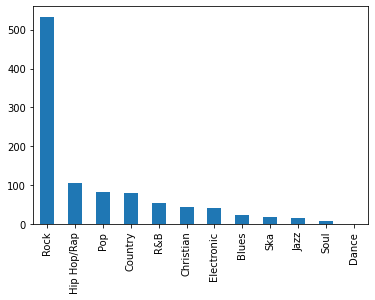

In [4]:
df_train['genre'].value_counts().plot(kind='bar')

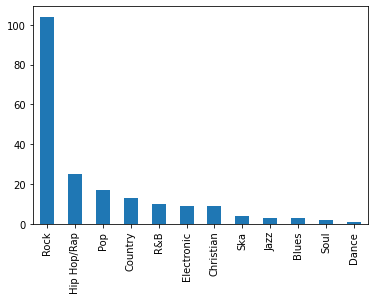

In [5]:
df_valid['genre'].value_counts().plot(kind='bar')

Mood

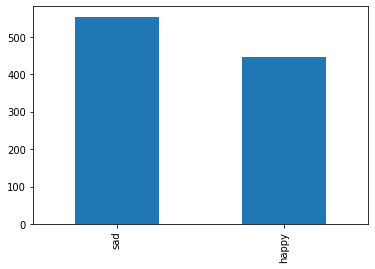

In [6]:
df_train['mood'].value_counts().plot(kind='bar')

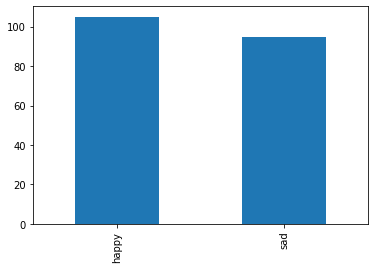

In [7]:
df_valid['mood'].value_counts().plot(kind='bar')

Word Clouds

Here let's check the most used words for both the moods.

# Data Preparation

In [8]:
df_total = pd.concat([df_train,df_valid])
df_total = df_total.sort_values('mood')
len(df_total)

1200

In [9]:
#df_total.head(10)

In [10]:
# splitting dataframe by groups 
# grouping by particular dataframe column 
grouped = df_total.groupby(df_total.mood) 

data_happy = grouped.get_group("happy")
data_sad = grouped.get_group("sad")
len(data_happy) , len(data_sad)

(551, 649)

Thus, we have split the entire dataset as "HAPPY" lyrics and 'SAD" lyrics.

In [11]:
data_happy["lyrics"][10]

"Nobody knows it but you've got a secret smile,\nAnd you use it only for me,\nNobody knows it but you've got a secret smile,\nAnd you use it only for me.\n\nSo use it and prove it,\nRemove this whirling sadness,\nI'm losing, I'm bluesing,\nBut you can save me from madness.\n\nNobody knows it but you've got a secret smile,\nAnd you use it only for me,\nNobody knows it but you've got a secret smile,\nAnd you use it only for me.\n\nSo save me I'm waiting,\nI'm needing, hear me pleading,\nAnd soothe me, improve me,\nI'm grieving, I'm barely believing now, now.\n\nWhen you are flying around and around the world,\nAnd I'm lying and lonely,\nI know there's something sacred and free reserved,\nAnd received by me only.\n\nNobody knows it but you've got a secret smile,\nAnd you use it only for me,\nNobody knows it but you've got a secret smile,\nAnd you use it only for me.\n\nSo use it and prove it,\nRemove this whirling sadness,\nI'm losing, I'm bluesing,\nBut you can save me from madness, now,

#Data Cleaning

In [12]:
import re
import string

Resolving contractions

In [13]:

# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)



In [14]:
def clean_data(df_new,column):
  # Expanding Contractions in the reviews
  df_new[column]=df_new[column].apply(lambda x:expand_contractions(x))
  print('Contractions expanded !')
  #df_new['text']=df_new['text'].apply(lambda x: x.lower())
  df_new[column]=df_new[column].apply(lambda x: re.sub('\w*\d\w*','', x))
  print('Escape Characters Removed !')
  #Removing Punctuations
  df_new[column]=df_new[column].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
  print('Punctuations Removed !')
  #Removing extra spaces
  df_new[column]=df_new[column].apply(lambda x: re.sub(' +',' ',x))
  print('Extra Spaces Removed !')

  return df_new

print('Happy:')
data_happy = clean_data(data_happy,'lyrics')
print('Sad:')
data_sad = clean_data(data_sad,'lyrics')

Happy:
Contractions expanded !
Escape Characters Removed !
Punctuations Removed !
Extra Spaces Removed !
Sad:
Contractions expanded !
Escape Characters Removed !
Punctuations Removed !
Extra Spaces Removed !


# Tokenization & Vectorization

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [16]:
happy_lyrics = ''
sad_lyrics = ''

for ind, row in data_happy.iterrows():
  happy_lyrics = happy_lyrics + row['lyrics'] + '\n'

for ind, row in data_sad.iterrows():
  sad_lyrics = sad_lyrics + row['lyrics'] + '\n'


In [17]:
# Create the Corpus
corpus_happy = happy_lyrics.lower().split("\n")
corpus_sad = sad_lyrics.lower().split("\n")

#Remove Null Entries and Spaces
corpus_happy = list(filter(str.strip, corpus_happy))
corpus_sad = list(filter(str.strip, corpus_sad))

len(corpus_happy) , len(corpus_sad)



(21312, 23850)

In [62]:
#Remove duplicate entries
corpus_happy = list(set(corpus_happy))
corpus_sad = list(set(corpus_sad))

#Reduce the dataset
corpus_happy = corpus_happy[:5000]
len(corpus_happy) , len(corpus_sad)

(5000, 17344)

In [79]:
#Tokenize the Tokens

tokenizer_happy = Tokenizer()
tokenizer_sad = Tokenizer()

tokenizer_happy.fit_on_texts(corpus_happy)
total_words_h = len(tokenizer_happy.word_index) + 1

tokenizer_sad.fit_on_texts(corpus_sad)
total_words_s = len(tokenizer_sad.word_index) + 1

print('Happy :')
#print(tokenizer_happy.word_index)
print(total_words_h)
print()
print()
print('Sad :')
#print(tokenizer_sad.word_index)
print(total_words_s)

Happy :
4439


Sad :
9797


In [64]:
total_words_h

4439

**Turn the Sentences into vectors**

In [65]:
def sentences_to_vec(tokenizer, corpus):

  input_sequences = []
  total_words = len(tokenizer.word_index) + 1
  for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
      n_gram_sequence = token_list[:i+1]
      input_sequences.append(n_gram_sequence)

  # pad sequences 
  max_sequence_len = max([len(x) for x in input_sequences])
  input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

  # create predictors and label
  xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

  ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

  return (xs,ys,max_sequence_len)



xs_happy, ys_happy,max_sequence_len_h = sentences_to_vec(tokenizer_happy, corpus_happy)
print("Done - Happy !")
#xs_sad, ys_sad = sentences_to_vec(tokenizer_sad, corpus_sad)
#print("Done - Sad !")

Done - Happy !


In [26]:
for i in ys_happy[8]:
  if i != 0:
    print(i)

1.0


In [66]:
len(xs_happy)

30211

# Model

In [67]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [68]:
#Predict Plot 

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

In [72]:
#Base Model
def base_model(total_words,max_sequence_len):

  model = Sequential()
  model.add(Embedding(total_words, 200, input_length=max_sequence_len-1))
  model.add(Bidirectional(LSTM(512)))#,return_sequences = True)))
  #model.add(tf.keras.layers.Dropout(0.2))
  #model.add(Bidirectional(LSTM(512)))
  #model.add(Bidirectional(LSTM(150))) #Added Later
  #model.add(Bidirectional(LSTM(150))) #Added Later
  model.add(Dense(total_words, activation='softmax'))

  #Loss Function & Optimizer
  #loss_func = tf.losses.SparseCategoricalCrossentropy(from_logits=True)
  loss_func = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
  opt = Adam(lr=0.01)
  model.compile(
        loss= loss_func, 
        optimizer = opt,
        metrics=['accuracy'])
  #earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
  print(model.summary())
  return(model)

Prediction - Happy Lyrics

In [73]:
base_model_h = base_model(total_words_h,max_sequence_len_h)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 134, 200)          887800    
_________________________________________________________________
bidirectional_20 (Bidirectio (None, 1024)              2920448   
_________________________________________________________________
dense_12 (Dense)             (None, 4439)              4549975   
Total params: 8,358,223
Trainable params: 8,358,223
Non-trainable params: 0
_________________________________________________________________
None


In [74]:
#Train the Model
history_base = base_model_h.fit(xs_happy,
         ys_happy,
         batch_size=128,
         epochs=20,
         verbose=1)

Epoch 1/20
237/237 [==============================] - 65s 260ms/step - loss: 7.5879 - accuracy: 0.0355
Epoch 2/20
237/237 [==============================] - 62s 260ms/step - loss: 5.8557 - accuracy: 0.1099
Epoch 3/20
237/237 [==============================] - 61s 259ms/step - loss: 4.6296 - accuracy: 0.1703
Epoch 4/20
237/237 [==============================] - 61s 259ms/step - loss: 3.7733 - accuracy: 0.2457
Epoch 5/20
237/237 [==============================] - 61s 259ms/step - loss: 3.0154 - accuracy: 0.3422
Epoch 6/20
237/237 [==============================] - 62s 260ms/step - loss: 2.4509 - accuracy: 0.4346
Epoch 7/20
237/237 [==============================] - 61s 259ms/step - loss: 2.0312 - accuracy: 0.5172
Epoch 8/20
237/237 [==============================] - 62s 261ms/step - loss: 1.7414 - accuracy: 0.5795
Epoch 9/20
237/237 [==============================] - 61s 259ms/step - loss: 1.5415 - accuracy: 0.6197
Epoch 10/20
237/237 [==============================] - 61s 259ms/step - l

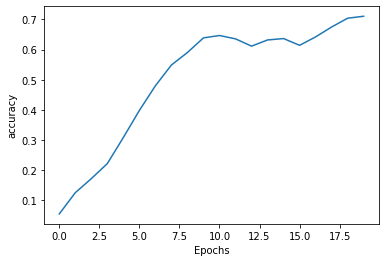

In [75]:
plot_graphs(history_base, 'accuracy')

Prediction - Sad Lyrics

In [ ]:
base_model_h,history_base = base_model(xs_happy,ys_happy)

In [ ]:
plot_graphs(history_base, 'accuracy')

# Results & Evaluation

In [76]:
def predict_words(seed_text,next_words,tokenizer,max_sequence_len,model):

  for _ in range(next_words):
	  token_list = tokenizer.texts_to_sequences([seed_text])[0]
	  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	  predicted = model.predict_classes(token_list, verbose=0)
	  output_word = ""
	  for word, index in tokenizer.word_index.items():
		  if index == predicted:
		  	output_word = word
		  	break
	  seed_text += " " + output_word
  print(seed_text)

In [77]:
seed_text = "I am so happy"
next_words = 100
  
predict_words(seed_text,next_words,tokenizer_happy,max_sequence_len_h,base_model_h)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


I am so happy here is shining can get a little dark clouds a body and he likes my hair done town yeah wide world and american dream yeah lots of death sweet rock she this meant fight fight fight fight fight fight fight fight fight a rock cause james right n here alone him with you do is all the reason for you may and top down down down down to the wire even through his mind to advance tell me how you are not got a new pony she knows how you are miles four crazy friends she must be deaf to


In [78]:
seed_text = "My country is"
next_words = 100
  
predict_words(seed_text,next_words,tokenizer_happy,max_sequence_len_h,base_model_h)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


My country is still the strong got a wall of a bottle at a local bar with my jaw was open up with talk and the back where we should give it all the love and love felt whole again mattress mattress mattress mattress mattress mattress mattress mattress mattress mattress mattress mattress mattress mattress mattress mattress love long to mind it is so much it is official i have waited so long you have waited so long you have waited so long you have waited so long you have waited so long you have waited so long you have waited so long you


In [ ]:
seed_text = "India is the best cricket team the players are very good and"
next_words = 100
  
predict_words(seed_text,next_words,tokenizer_happy,max_sequence_len_h,base_model_h)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


India is the best cricket team the players are very good and i am running from first more time to be careful the lightman cup if you know you are not know you are not know you are not know you are not know you are not know you are not know you are not know you are not know you are not know you are not know you are not know you are not know you are not know you are not know you are not know you are not know you are not know you are not know you are not know you are not know you are not know
